# Prep Notebook 4
## More Regression Work

This notebook has a few exercises that can serve as a primer for what to expect in the `Problem Session 4` notebook.

#### 1. Reading a .csv file

Read in the `carseats.csv` file using `pandas`. Store it in a variable named `carseats`.

##### Sample Solution

In [1]:
import pandas as pd

In [2]:
carseats = pd.read_csv("../../data/carseats.csv")

In [3]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### 2. Descriptive statistics

##### a.

Find the mean and median of `Sales`.

##### Sample Solution

In [4]:
carseats.Sales.mean()

7.496325000000001

In [5]:
carseats.Sales.median()

7.49

##### b.

Use `groupby`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html</a>, to find the mean and median value of `Sales` for each possible value of `ShelveLoc`.

##### Sample Solution

In [6]:
carseats.groupby('ShelveLoc').Sales.mean()[['Bad', 'Medium', 'Good']]

ShelveLoc
Bad        5.522917
Medium     7.306575
Good      10.214000
Name: Sales, dtype: float64

In [7]:
carseats.groupby('ShelveLoc').Sales.median()[['Bad', 'Medium', 'Good']]

ShelveLoc
Bad        5.21
Medium     7.38
Good      10.50
Name: Sales, dtype: float64

#### 3. Box-and-whisker plots

A box-and-whisker plot is one way in which you can display some aspects of the empirical distribution for a given variable. In the diagram below you can see the features of a box-and-whisker plot.

<img src="boxplot.png" width="27%"></img>

The "box" of the plot displays the <i>interquartile range</i> (IQR) by placing the 25th percentile at the base and the 75th percentile at the top. The median line is drawn inside the box. The "whiskers" of the plot extend from the box and typically extend to 1.5 times the IQR above the 75th percentile and below the 25th percentile. <i>Note: that this is not always standard and each piece of software handles the whiskers differently.</i>

##### a. 

Use `seaborn`'s `boxplot` function to visualize the empirical distribution of `Sales`.

<a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">https://seaborn.pydata.org/generated/seaborn.boxplot.html</a>.

##### Sample Solution

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

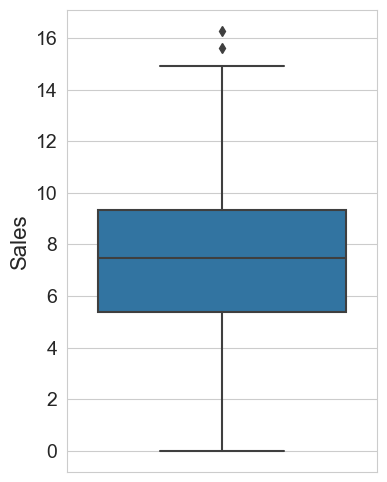

In [9]:
plt.figure(figsize = (4,6))

sns.boxplot(data = carseats,
               y = 'Sales')

plt.ylabel("Sales", fontsize=16)
plt.yticks(fontsize=14)

plt.show()

##### b.

Now use `boxplot` to plot the box-and-whisker plot of `Sales` by value of `ShelveLoc`.

##### Sample Solution

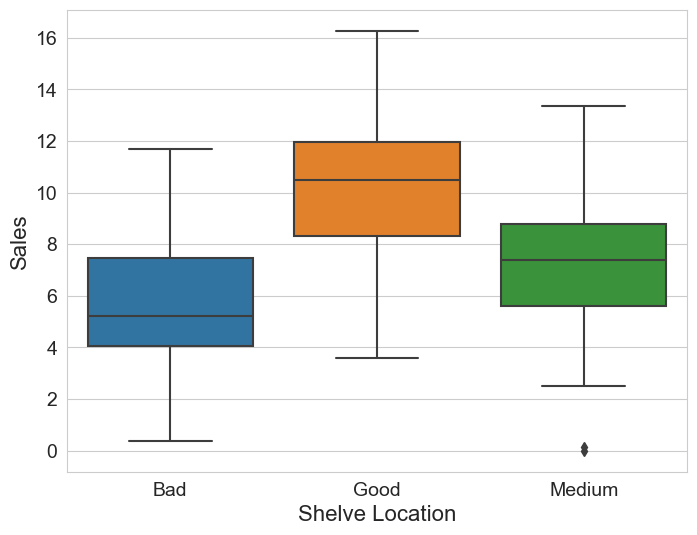

In [10]:
plt.figure(figsize = (8,6))

sns.boxplot(data = carseats,
               y = 'Sales',
               x = 'ShelveLoc')

plt.ylabel("Sales", fontsize=16)
plt.yticks(fontsize=14)

plt.xlabel("Shelve Location", fontsize=16)
plt.xticks(fontsize=14)

plt.show()

##### c.

Figure out how to use the `order` argument to `boxplot` to arrange the `ShelveLoc` box-and-whisker plots in the order of increasing quality.

##### Sample Solution

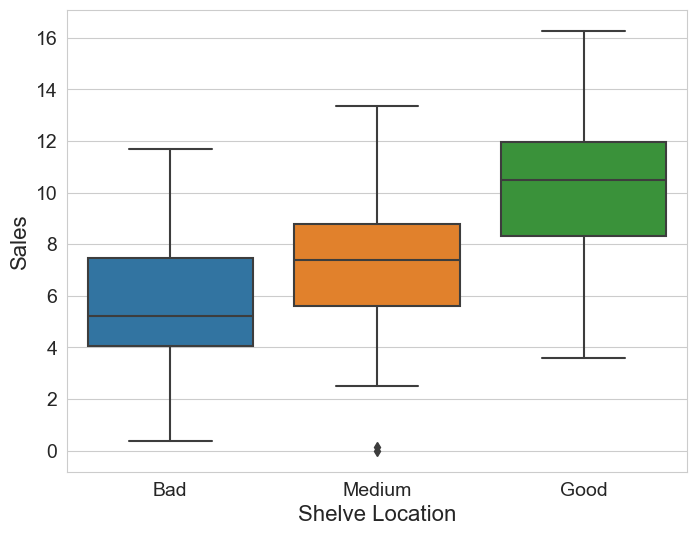

In [11]:
plt.figure(figsize = (8,6))

sns.boxplot(data = carseats,
               y = 'Sales',
               x = 'ShelveLoc',
               order = ['Bad', 'Medium', 'Good'])

plt.ylabel("Sales", fontsize=16)
plt.yticks(fontsize=14)

plt.xlabel("Shelve Location", fontsize=16)
plt.xticks(fontsize=14)

plt.show()

#### 4. Train test split

Make a train test split of `carseats`. Set aside 73% of the data as a training set.

##### Sample Solution

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
carseats_train, carseats_test = train_test_split(carseats.copy(),
                                                    train_size=.73,
                                                    random_state=123,
                                                    shuffle=True)

#### 5. Cross-validation

Print out the training and holdout indices for a 7-fold cross-validation of `carseats_train`.

##### Sample Solution

In [14]:
from sklearn.model_selection import KFold

In [15]:
kfold = KFold(7,
                shuffle=True,
                random_state=5309)

i = 0
for train_index, test_index in kfold.split(carseats_train):
    print("CV Split:", i)
    print("==================")
    print("Train:", train_index)
    print("Test:", test_index)
    print()
    i = i + 1

CV Split: 0
Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18
  19  20  21  22  23  24  25  28  29  30  31  32  33  34  35  36  37  39
  40  41  42  43  44  45  46  47  48  49  50  51  53  54  55  56  57  58
  59  60  61  62  63  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  83  84  85  86  87  89  90  91  92  93  94  95  96  97  99 102
 104 105 107 108 109 110 111 112 113 114 115 117 118 119 120 121 122 123
 124 125 126 127 129 130 133 134 135 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 163 165
 166 167 169 170 171 172 173 175 177 178 179 180 181 182 183 184 186 187
 188 189 190 192 193 194 195 196 197 198 199 200 201 202 203 204 206 207
 208 210 211 212 213 214 215 216 217 218 219 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 236 237 238 239 240 241 242 243 244 245 247
 248 249 250 251 252 253 254 255 256 257 258 260 261 262 264 266 267 268
 269 270 271 273 274 275 276 277

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)